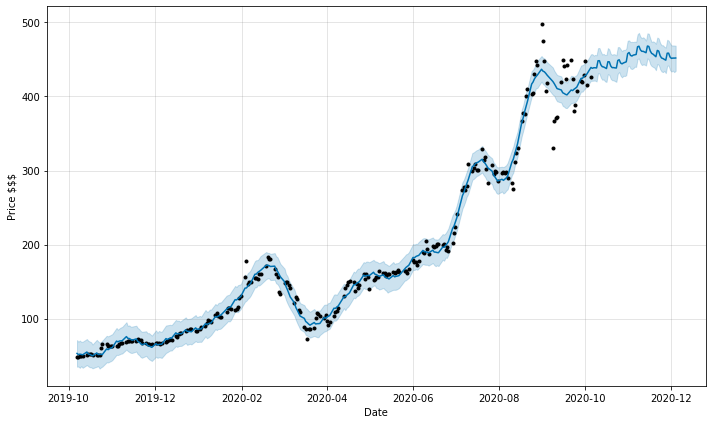

In [4]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import warnings
from fbprophet import Prophet
warnings.simplefilter(action='ignore', category=FutureWarning)

end = dt.datetime.now()
start = dt.datetime(end.year - 1, end.month, end.day)

df = reader.get_data_yahoo('TSLA', start, end)
model = Prophet(daily_seasonality=True,yearly_seasonality=True)
df = df.reset_index()
df[['ds','y']] = df[['Date', 'Adj Close']]
model.fit(df)
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Price $$$')
plt.show()